In [1]:
import ROOT
from ROOT import gStyle
gStyle.SetOptStat(0)

Welcome to JupyROOT 6.28/00


In [2]:
myFile_gel = ROOT.TFile.Open("/Users/bertabeltran/MIST/data/anticoincidence/anticoincidence_test_16n_3d_thres_long/RAW/HcompassR_anticoincidence_test_16n_3d_thres_long_20240531_101517.root")

In [3]:
myFile_gel.ls()

TFile**		/Users/bertabeltran/MIST/data/anticoincidence/anticoincidence_test_16n_3d_thres_long/RAW/HcompassR_anticoincidence_test_16n_3d_thres_long_20240531_101517.root	
 TFile*		/Users/bertabeltran/MIST/data/anticoincidence/anticoincidence_test_16n_3d_thres_long/RAW/HcompassR_anticoincidence_test_16n_3d_thres_long_20240531_101517.root	
  KEY: TDirectoryFile	Energy;1	Energy
  KEY: TDirectoryFile	Time;1	Time
  KEY: TDirectoryFile	PSD;1	PSD
  KEY: TDirectoryFile	PSD_E;1	PSD_E
  KEY: TTime	RealTime_0;1	object title
  KEY: TTime	LiveTime_0;1	object title
  KEY: TTime	RealTime_1;1	object title
  KEY: TTime	LiveTime_1;1	object title
  KEY: TTime	RealTime_2;1	object title
  KEY: TTime	LiveTime_2;1	object title


In [4]:
live_time_2=myFile_gel.Get("LiveTime_2")
ltime_2=live_time_2.AsString()# lenth of run in milisecons 
ltime_sec_2=int(ltime_2)/1000 # we make it into seconds 

real_time_0=myFile_gel.Get("RealTime_0")
time_0=real_time_0.AsString()# lenth of run in milisecons 
time_sec_0=int(time_0)/1000 # we make it into seconds 


print("real time (sec)", ltime_sec_2, "live time (sec)", time_sec_0)

real time (sec) 65155.802 live time (sec) 65248.799


In [5]:
real_time_1=myFile_gel.Get("RealTime_1")
time_1=real_time_1.AsString()# lenth of run in milisecons 
time_sec_1=int(time_1)/1000 # we make it into seconds 
time_sec_1/3600

18.12466638888889

In [6]:
dir_gel = myFile_gel.GetDirectory("Energy");

In [7]:
dir_gel.ls()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_R_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_R_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title
 KEY: TH1D	_R_EnergyCH2@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_2;1	object title


123869.0


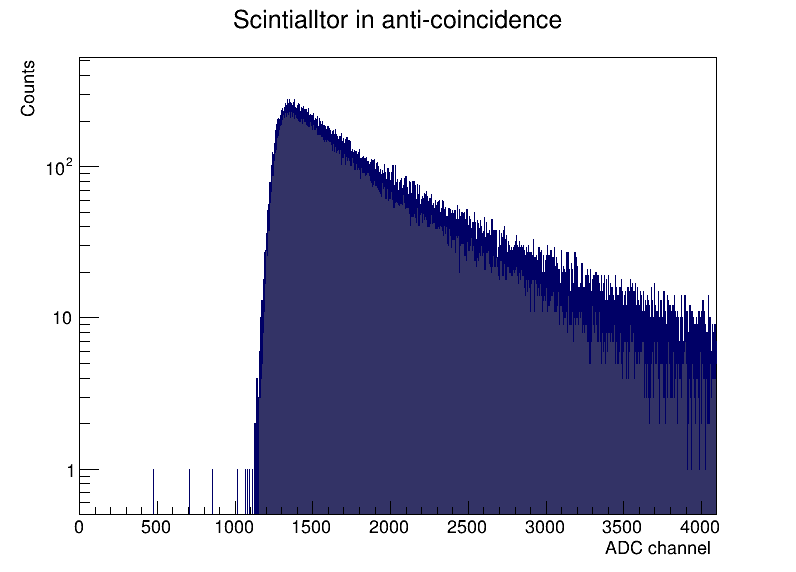

In [8]:
hist_gel_0 = dir_gel.Get("_R_EnergyCH2@DT5751_1615;1")
#hist_gel_0.Rebin(7)
c0 = ROOT.TCanvas("c0"," ",800,600)

integral_0=hist_gel_0.Integral(1500,4500) 
print(integral_0)

hist_gel_0.GetYaxis().SetTitleOffset(1.2)
hist_gel_0.SetTitle("Scintialltor in anti-coincidence")

hist_gel_0.Draw()
c0.Draw()
ROOT.gPad.SetLogy()

#nbins=hist_gel_0.GetNbinsX()
#nbins

In [9]:
import uproot
import numpy as np
from matplotlib import pyplot as plt
from os import path

In [10]:
#Open ROOT file
file_path = "/Users/bertabeltran/MIST/data/anticoincidence/anticoincidence_test_16n_3d_thres_long/RAW/SDataR_anticoincidence_test_16n_3d_thres_long.root"
file=uproot.open(file_path)
tree=file["Data_R"]
print(tree.keys())

#Load data for channels and timestamps
#timestamps = tree["Timestamp"].array(library = "np")*10**(-3) #Convert picoseconds to nano
timestamps = tree["Timestamp"].array(library = "np") # picoseconds
channel = tree["Channel"].array(library = "np")
energy = tree["Energy"].array(library = "np")
flags = tree["Flags"].array(library = "np")

['Channel', 'Timestamp', 'Board', 'Energy', 'EnergyShort', 'Flags']


In [11]:
#Create masks for channels
CH0_mask = channel == 0
CH1_mask = channel == 1
CH2_mask = channel == 2


#Get timestamps for each channel (time in picoseconds from the begining of the run)
CH0_timestamps = timestamps[CH0_mask]
CH1_timestamps = timestamps[CH1_mask]
CH2_timestamps = timestamps[CH2_mask]


#Calculate energy of events on each channel
CH0_energy = energy[CH0_mask]
CH1_energy = energy[CH1_mask]
CH2_energy = energy[CH2_mask]


In [12]:
#calcualte how many events we have in this run in the anticoincidemce channel 
len(CH2_timestamps)

181856

In [16]:
# alternaive way to get the life time of the run by loooking at last time stamp- first timestamp 
mytime=(CH2_timestamps[-1]-CH2_timestamps[0])/1e+12
mytime

65156.005164883

In [15]:
# calculate the rate by dividing the total numer of events by the run live time 
len(CH2_timestamps)/ltime_sec_2

2.7910944907101287

In [17]:
# or with our calculated lifetime 
len(CH2_timestamps)/mytime

2.7910857877151525

In [18]:
# calculate the time difference between coincidences events by looking at the time differences in ch0 for exmaple 
CH2_time_diff = np.diff(CH2_timestamps)

In [19]:
# now we transform these time differences into seconds 
CH2_time_diff=CH2_time_diff/1e+12
CH2_time_diff


array([0.04904012, 0.01104262, 0.00614572, ..., 0.31626755, 0.29674051,
       0.03872727])

 FCN=52.7572 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=2.01487e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.04453e+01   3.32382e-03   8.40205e-06   1.92862e-02
   2  Slope       -4.72749e+00   1.10964e-02   2.80499e-05   7.97528e-05


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: png file /Users/bertabeltran/MIST/data/anticoincidence/rate.png has been created


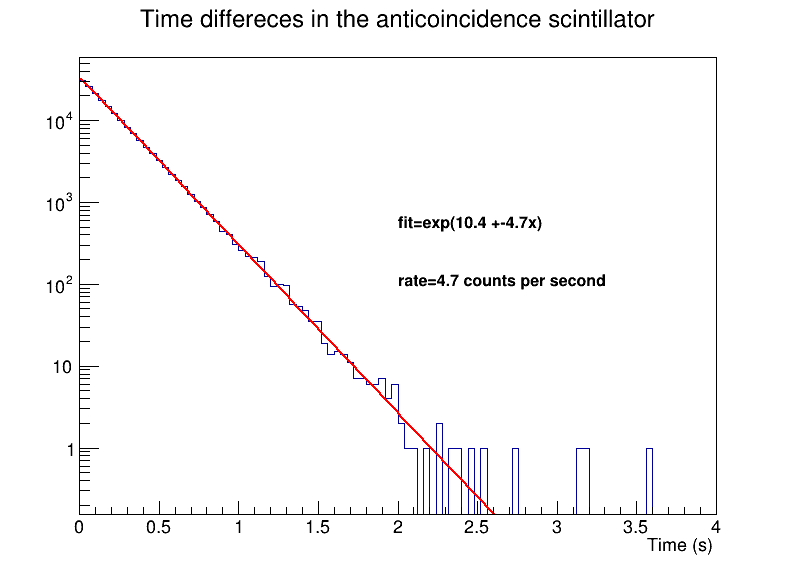

In [20]:
# I create this plot in Root as I am better a fititng it than with curve_fit in pythin for example 
h=ROOT.TH1D("h1", "Time differeces in the anticoincidence scintillator", 100, 0, 4)
for xeach in CH2_time_diff:
    h.Fill(xeach)
    
    
# Fit histogram with root #
h.Fit('expo','','',0,3)

# Get Root Fit and Goodness of Fit Parameters #
f = h.GetFunction('expo')
p0,p1 = f.GetParameter(0), f.GetParameter(1)
ep0,ep1 = f.GetParError(0), f.GetParError(1)
    
  
c1 = ROOT.TCanvas("c0"," ",800,600)
h.Draw()
h.GetXaxis().SetTitle("Time (s)") 

latex = ROOT.TLatex() 
latex.SetNDC() 
latex.SetTextSize(0.03)
latex.DrawText(0.5,0.6,"fit=exp(%.1f +%0.1fx)"%(p0,p1))  
latex.DrawText(0.5,0.5,"rate=%0.1f counts per second"%(abs(p1))) 
ROOT.gPad.SetLogy()
c1.Draw()
c1.SaveAs("/Users/bertabeltran/MIST/data/anticoincidence/rate.png")

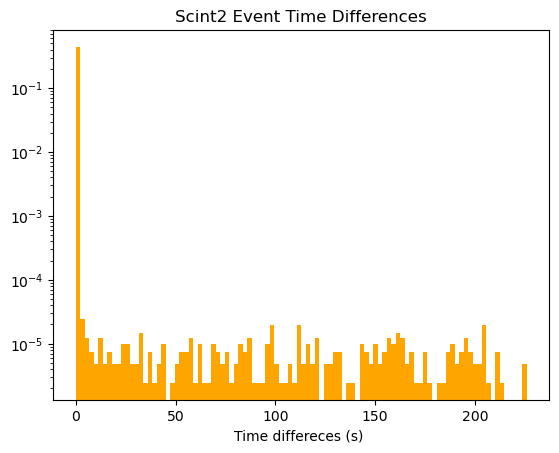

In [44]:
#Plot time difference in chan 2
#plt.hist(CH2_time_diff, bins = 100,range=(0,4),histtype='stepfilled' ,density=True,color ='orange')
plt.hist(CH2_time_diff, bins = 100,histtype='stepfilled' ,density=True,color ='orange')
ax3=plt.gca()
ax3.set_title("Scint2 Event Time Differences")
ax3.set_xlabel("Time differeces (s) ")
plt.yscale('log')


plt.show()


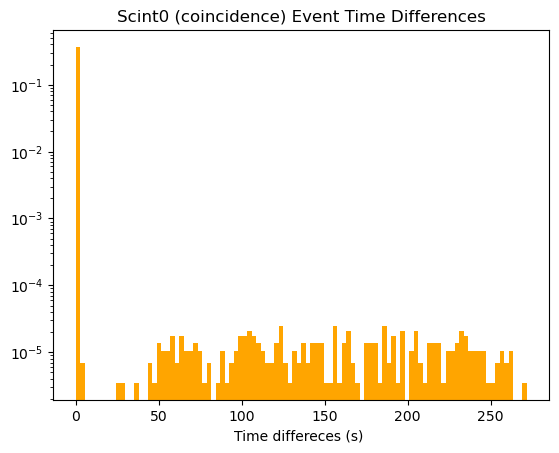

In [49]:
#I also want to plot the time differneces in chan0, one of the channels in coincidence 



CH0_time_diff = np.diff(CH0_timestamps)
CH0_time_diff=CH0_time_diff/1e+12  #make it seconds 

plt.hist(CH0_time_diff, bins = 100, histtype='stepfilled' ,density=True,color ='orange')
#plt.hist(CH0_time_diff, bins = 100,range=(0,4), histtype='stepfilled' ,density=True,color ='orange')
ax3=plt.gca()
ax3.set_title("Scint0 (coincidence) Event Time Differences")
ax3.set_xlabel("Time differeces (s) ")
plt.yscale('log')


plt.show()


Expo function coefficients:
[10.44372193 -4.71645983]
Covariance of coefficients:
[[ 1.31315161e-06 -6.22925160e-06]
 [-6.22925160e-06  5.80726396e-05]]


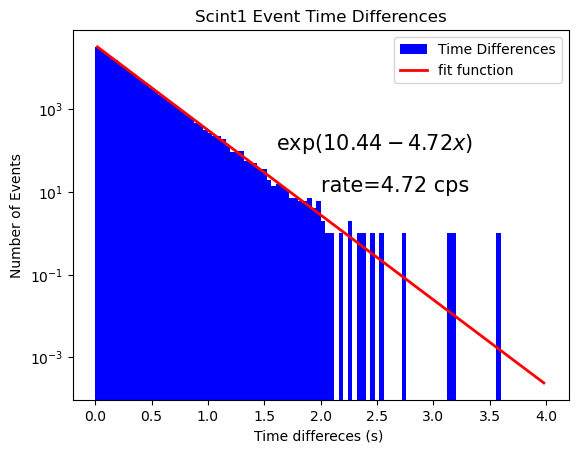

In [43]:
# now I am going to try and fit the time differences plot with curve_fit

import numpy as np
from scipy.optimize import curve_fit
#firts I define the exponential fucntion that I will be fitting 
def expo(x, a, b):
    return  np.exp(a+(b*x))

#here I caculate the bin centers for the fit               
def bincenters(bins):
    return (bins[1:] + bins[:-1]) / 2
                   
# define the histogram that I will be fitting to and return the bin contents and the bid edeges    
bin_cont, bin_edges, patches = plt.hist(CH2_time_diff, bins = 100, range=(0,4),histtype='stepfilled' , color ='blue',label ="Time Differences")
                   
# here I do the fit a return the fit values     
param, param_cov = curve_fit(expo, bincenters(bin_edges),bin_cont)
                   
# print the values     
print("Expo function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

# now I also want to draw the fitted function on top of the histogram 
fit_func= expo(bincenters(bin_edges),param[0] ,param[1] )
plt.plot(bincenters(bin_edges), fit_func, 'red', linewidth=2, label ="fit function ")       

fit_eq= r"exp$({:.2f} {:.2f}x)$".format(param[0] ,param[1])

ax=plt.gca()
ax.text(1.6, 100, fit_eq, fontsize=15)
ax.text(2, 10, "rate={:.2f} cps".format(abs(param[1])), fontsize=15)

plt.legend()
plt.yscale('log')
ax.set_title("Scint1 Event Time Differences")
ax.set_xlabel("Time differeces (s) ")
ax.set_ylabel('Number of Events')
plt.show()

In [22]:
# caculate the event rate for chan 2, which is the one in anticoincidence 
# first convert the time stamps to seconds 
CH2_timestamps=CH2_timestamps/1e+12
CH2_timestamps

array([1.55991113e-01, 2.05031231e-01, 2.16073854e-01, ...,
       6.51558257e+04, 6.51561224e+04, 6.51561612e+04])

In [23]:
#now I floor this array to see only seconds 
rate=np.floor(CH2_timestamps)
rate

array([    0.,     0.,     0., ..., 65155., 65156., 65156.])

Text(0.5, 0, 'Seconds from the begining of the run')

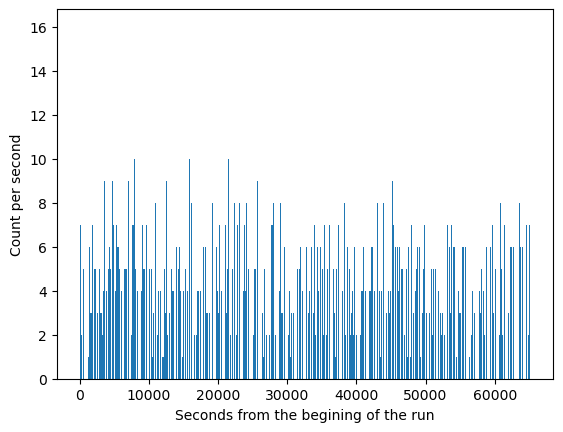

In [35]:
import matplotlib.pyplot as plt 
bin_contents, bin_edges, patches =plt.hist(rate,bins = 65157)
#bin_contents, bin_edges, patches =plt.hist(rate, bins = 6832,range=(0,6831))
#bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
ax = plt.gca()
ax.set_ylabel("Count per second")
ax.set_xlabel("Seconds from the begining of the run")

In [36]:
# I see that there are gaps in the rate histogram where the counts per second are 0
# I want to look at the bins that are not like that 
nonzero_bin_contents=bin_contents[bin_contents!=0]

In [37]:
# this is the rate when we don't take those gaps in the data into account
# was the digitizer dead for those gaps? I can not see how they are real 
# this rate also agrees with what we get from fitting the exponential 
np.mean(nonzero_bin_contents)

4.739906690645607

In [38]:
# this is the rate that we get when we take into account all the data gaps, but that can not be real 
np.mean(bin_contents)

2.7910431726445357

In [26]:
bin_edges

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 6.5154e+04, 6.5155e+04,
       6.5156e+04])

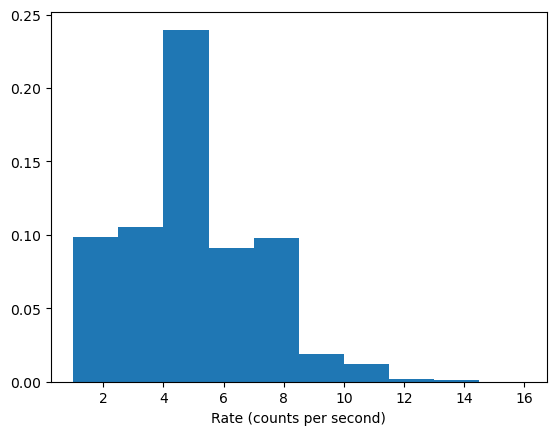

In [34]:
import matplotlib.pyplot as plt 
from scipy.stats import norm

plt.hist(nonzero_bin_contents, density=True)
#plt.hist(bin_contents, density=True,bins =13,range=(1,14))


ax = plt.gca()
ax.set_xlabel("Rate (counts per second)")
 
plt.show()